# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [3]:
samples = 1000
X,y = make_classification(n_samples=samples, n_features=2,
                          n_informative=2, n_redundant=0,
                          n_clusters_per_class=1)

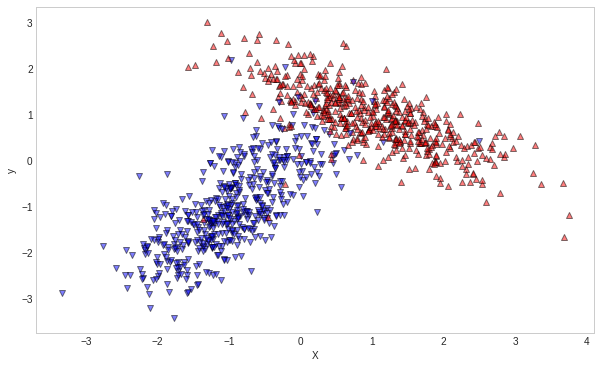

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.grid()
ax.set_xlabel("X")
ax.set_ylabel("y")

for i in range(samples):
  if y[i]==0:
    ax.scatter(X[i,0], X[i,1], edgecolors="k", alpha=0.5, marker="^", color="r")
  
  else:
    ax.scatter(X[i,0], X[i,1], edgecolors="k", alpha=0.5, marker="v", color="b")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("train score", model.score(X_train, y_train))
print("test score", model.score(X_test, y_test))

train score 0.9625
test score 0.96


In [7]:
scores = cross_val_score(model, X, y, scoring="accuracy", cv=10)
print("평균 점수", scores.mean())

평균 점수 0.959


In [8]:
model.intercept_, model.coef_

(array([1.7550243]), array([[-2.72088295, -2.80494809]]))

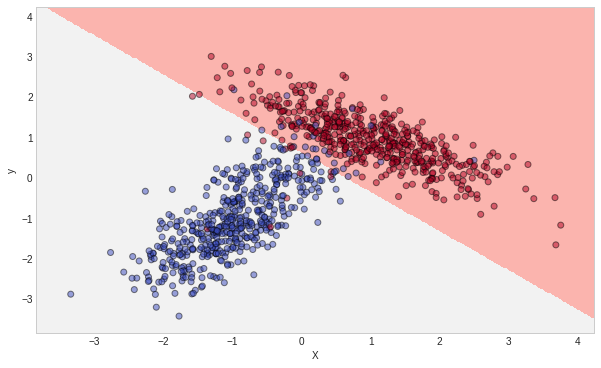

In [9]:
x_min, x_max = X[:, 0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:, 0].min() - 0.5, X[:,0].max() + 0.5

# meshgrid : numpy의 meshgrid 함수는 1차원 좌표 배열 (x1, x2..... xn)에서 N차원 직사각형 격자를 만드는 함수

xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(10,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], c=np.abs(y - 1), edgecolors="k", alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlabel("X")
plt.ylabel("y")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()

## 붓꽃 데이터

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [11]:
import pandas as pd 

df = pd.DataFrame(iris.data, columns=iris.feature_names)
species = pd.Series(iris.target, dtype="category")
species = species.cat.rename_categories(iris.target_names) # 0,1,2로 구성된 타겟을 품종으로 이름 바꾸는 코드 
df["species"] = species

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


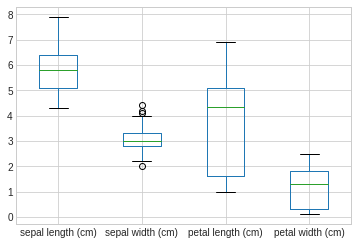

In [13]:
df.boxplot();

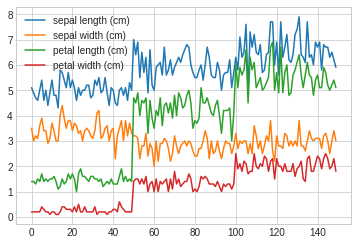

In [14]:
df.plot();
# 그래프가 큰 폭으로 변동되는 기점을 기준으로 그룹화할 수 있겠구나를 생각해야한다. 

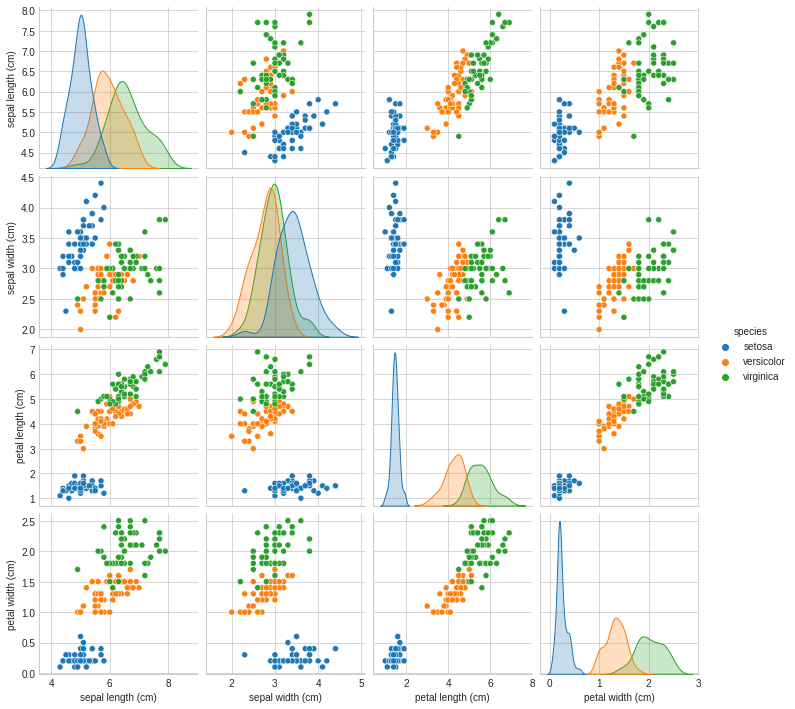

In [15]:
import seaborn as sns

sns.pairplot(df, hue="species");

## 붓꽃 데이터에 대한 로지스틱 회귀

In [16]:
from sklearn.model_selection import train_test_split

y = df["species"]
X = df.drop(columns="species")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = LogisticRegression(solver="lbfgs", multi_class="auto", C=100.0, random_state=42)
model.fit(X_train, y_train)
print("train score", model.score(X_train, y_train))
print("test score", model.score(X_test, y_test))

train score 0.9833333333333333
test score 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"penalty":["l1", "l2"],
               "C" : [2.0, 2.2, 2.4, 2.6, 2.8]
               }]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring="accuracy", cv=10, n_jobs=-1)

gs.fit(X_train, y_train)
print(gs.best_estimator_)
print(gs.best_score_)

LogisticRegression(C=2.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.9666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
pd.DataFrame(gs.fit(X_train, y_train).cv_results_)

In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
predicted_proba = gs.predict_proba(X_test)
predicted_proba[:,0], predicted_proba[:,1]

(array([9.93959249e-01, 2.79499591e-04, 1.25512152e-01, 9.83186576e-02,
        9.95423170e-01, 1.26041930e-03, 9.98481032e-01, 9.61442685e-01,
        2.15873572e-05, 4.89447092e-03, 2.69444190e-08, 1.34080468e-05,
        2.30897808e-07, 1.92668637e-03, 9.86657866e-01, 9.88304678e-01,
        9.92433874e-01, 1.21141400e-02, 1.00949238e-03, 4.96130578e-04,
        9.84940677e-01, 4.26942170e-07, 7.67293052e-04, 8.81835209e-06,
        5.52088072e-07, 1.33248264e-04, 1.53585233e-03, 9.66409370e-01,
        7.29094002e-06, 9.86687469e-01]),
 array([0.00604075, 0.36156477, 0.87354706, 0.900721  , 0.00457683,
        0.8003736 , 0.00151897, 0.03855731, 0.11077216, 0.80234321,
        0.00927664, 0.08039906, 0.0062023 , 0.92472319, 0.01334213,
        0.01169532, 0.00756613, 0.98111394, 0.83924258, 0.42668733,
        0.01505932, 0.00771264, 0.94665285, 0.12989726, 0.00991963,
        0.50550179, 0.9634896 , 0.03359063, 0.08332843, 0.01331253]))

In [52]:
answer = pd.DataFrame(predicted_proba[:,1], columns=["예측값"])
answer.head()

,예측값
0,0.006041
1,0.361565
2,0.873547
3,0.900721
4,0.004577


In [53]:
answer.to_csv("20210614.csv",index=False)
print("-"*10)
print(pd.read_csv("20210614.csv"))

----------
         예측값
0   0.006041
1   0.361565
2   0.873547
3   0.900721
4   0.004577
5   0.800374
6   0.001519
7   0.038557
8   0.110772
9   0.802343
10  0.009277
11  0.080399
12  0.006202
13  0.924723
14  0.013342
15  0.011695
16  0.007566
17  0.981114
18  0.839243
19  0.426687
20  0.015059
21  0.007713
22  0.946653
23  0.129897
24  0.009920
25  0.505502
26  0.963490
27  0.033591
28  0.083328
29  0.013313


# 확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

In [55]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [56]:
X, y = load_boston(return_X_y =True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(StandardScaler(), SGDRegressor(loss="squared_loss"))
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [57]:
print("train score", model.score(X_train, y_train))
print("test score", model.score(X_test, y_test))

train score 0.7500681195896949
test score 0.6601618622700405


## 붓꽃 데이터에 대한 SGD 분류

In [64]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [66]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipe = make_pipeline(StandardScaler(), SGDClassifier(loss="log"))

pipe.fit(X_train, y_train)

print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.9619047619047619
0.9777777777777777


In [70]:
proba = pipe.predict_proba(X_test)
answer = pd.DataFrame(proba[:, 1], columns=["1로 예측"])

answer.to_csv("20210614.csv", index=False)
print(pd.read_csv("20210614.csv").head())

      1로 예측
0  0.999997
1  0.001467
2  0.000006
3  0.996935
4  0.977330


## 유방암 데이터에 대한 SGD 분류

In [71]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipe = make_pipeline(StandardScaler(), SGDClassifier(loss="log"))

pipe.fit(X_train, y_train)

print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.9773869346733668
0.9649122807017544


In [72]:
proba = pipe.predict_proba(X_test)
answer = pd.DataFrame(proba[:, 1], columns=["1로 예측"])

answer.to_csv("20210614.csv", index=False)
print(pd.read_csv("20210614.csv").head())

          1로 예측
0  9.999990e-01
1  2.135614e-43
2  5.670727e-24
3  1.000000e+00
4  1.000000e+00
